In [1]:
import random
import matplotlib.pyplot as plt

In [14]:
def MonteCarlo_sim_prob(n_trials):
    stick_wins = 0
    switch_wins = 0
    
    for _ in range(n_trials):
        boxes = [100, 10, 10]  # Box 1 contains $100, Boxes 2 and 3 contain $10
        random.shuffle(boxes)  # Shuffling the boxes
        
        # Choosing a box
        chosen_box = random.randint(0, 2)
        
        # If the chosen box contains $100, the friend can open either box 2 or 3
        if boxes[chosen_box] == 100:
            opened_box = random.choice([1, 2])
        else:
            opened_box = 3
        
        # Switch to the other unopened box
        switch_box = [i for i in range(3) if i != chosen_box and i != opened_box][0]
        
        # Check if the switched box contains $100
        if boxes[switch_box] == 100:
            switch_wins += 1
        else:
            stick_wins += 1
    
    return stick_wins, switch_wins

Sticking with the initial choice:
  Number of wins: 66657
  Probability of winning: 0.66657

Switching to another box:
  Number of wins: 33343
  Probability of winning: 0.33343


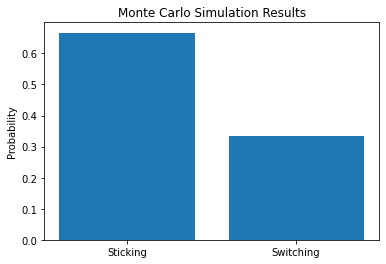

In [29]:
# Running the simulation
n_trials = 100000
stick_wins, switch_wins = MonteCarlo_sim_prob(n_trials)

# Calculating probabilities
stick_prob = stick_wins / n_trials
switch_prob = switch_wins / n_trials

# Printing the results
print("Sticking with the initial choice:")
print("  Number of wins:", stick_wins)
print("  Probability of winning:", stick_prob)

print("\nSwitching to another box:")
print("  Number of wins:", switch_wins)
print("  Probability of winning:", switch_prob)

# Creating a bar graph to visualize the probabilities
labels = ['Sticking', 'Switching']
probabilities = [stick_prob, switch_prob]

plt.bar(labels, probabilities)
plt.ylabel('Probability')
plt.title('Monte Carlo Simulation Results')
plt.show()


In [28]:
from scipy.integrate import quad
import numpy as np

def MonteCarlo_Integration(func, lower_bound, upper_bound, n_samples):
    total = 0.0
    
    #for each random value of x between 0 and 1, we will calucate initial integral and generate cumulative sum as total
    for _ in range(n_samples):
        x = random.uniform(lower_bound, upper_bound)
        total += func(x)
    
    average = total / n_samples
    integral = average * (upper_bound - lower_bound)
    
    return integral

def function(x):
    return x * np.cos(71 * x) + np.sin(13 * x)

lower_bound = 0
upper_bound = 1
n_samples = 100000

integral = MonteCarlo_Integration(function, lower_bound, upper_bound, n_samples)
print("Approximated integral:", integral)


Approximated integral: 0.021430194116423714
